#**CLASSIFICATION AND REGRESSION ALGORITHMS**

###Machine Learning

####Daniela Gómez Ayalde

## **LINEAR REGRESSION**

Supervised Learning Algorithms

### **Libraries**

In [1]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

### **Dataset and Exploratory Data Analysis**

In [2]:
!git clone https://github.com/DanielaGomez98/Classification_and_Regression_ML.git

Cloning into 'Classification_and_Regression_ML'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
dataset = pd.read_csv("/content/Classification_and_Regression_ML/data_price_cars.csv")
dataset

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
dataset.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [6]:
df = dataset.drop(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Style', 'Vehicle Size'], axis=1)
df.head(5)

Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  city mpg  \
0  2011      335.0               6.0              2.0           26        19   
1  2011      300.0               6.0              2.0           28        19   
2  2011      300.0               6.0              2.0           28        20   
3  2011      230.0               6.0              2.0           28        18   
4  2011      230.0               6.0              2.0           28        18   

   Popularity   MSRP  
0        3916  46135  
1        3916  40650  
2        3916  36350  
3        3916  29450  
4        3916  34500

In [7]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Number of Doors": "Doors", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

Year     HP  Cylinders  Doors  MPG-H  MPG-C  Popularity  Price
0  2011  335.0        6.0    2.0     26     19        3916  46135
1  2011  300.0        6.0    2.0     28     19        3916  40650
2  2011  300.0        6.0    2.0     28     20        3916  36350
3  2011  230.0        6.0    2.0     28     18        3916  29450
4  2011  230.0        6.0    2.0     28     18        3916  34500

In [8]:
df.shape

(11914, 8)

In [9]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (936, 8)


In [10]:
df = df.drop_duplicates()
df.shape

(10978, 8)

In [11]:
print(df.isnull().sum())

Year           0
HP            69
Cylinders     30
Doors          6
MPG-H          0
MPG-C          0
Popularity     0
Price          0
dtype: int64


In [12]:
df = df.dropna()
df.shape

(10879, 8)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
Doors             2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21405.0
dtype: float64


In [14]:
#All data below the 25th quartile and above the 75th quartile are eliminated. 

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8467, 8)

Year        HP  Cylinders     Doors     MPG-H     MPG-C  \
Year        1.000000  0.319454  -0.108443  0.240652  0.371877  0.334186   
HP          0.319454  1.000000   0.736582  0.037214 -0.457397 -0.557806   
Cylinders  -0.108443  0.736582   1.000000  0.019419 -0.692816 -0.747027   
Doors       0.240652  0.037214   0.019419  1.000000  0.007351  0.025044   
MPG-H       0.371877 -0.457397  -0.692816  0.007351  1.000000  0.937117   
MPG-C       0.334186 -0.557806  -0.747027  0.025044  0.937117  1.000000   
Popularity  0.199185  0.094563   0.013976 -0.079305  0.091836  0.080065   
Price       0.579691  0.746398   0.393770  0.127047 -0.129074 -0.204958   

            Popularity     Price  
Year          0.199185  0.579691  
HP            0.094563  0.746398  
Cylinders     0.013976  0.393770  
Doors        -0.079305  0.127047  
MPG-H         0.091836 -0.129074  
MPG-C         0.080065 -0.204958  
Popularity    1.000000  0.110515  
Price         0.110515  1.000000

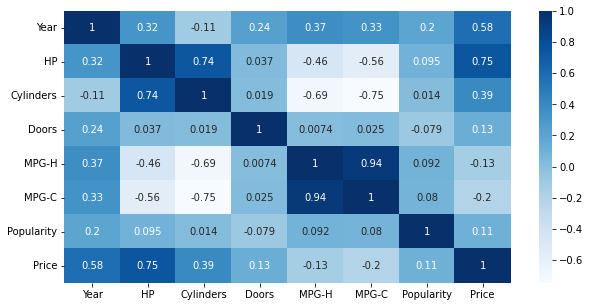

In [15]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="Blues", annot=True)
c

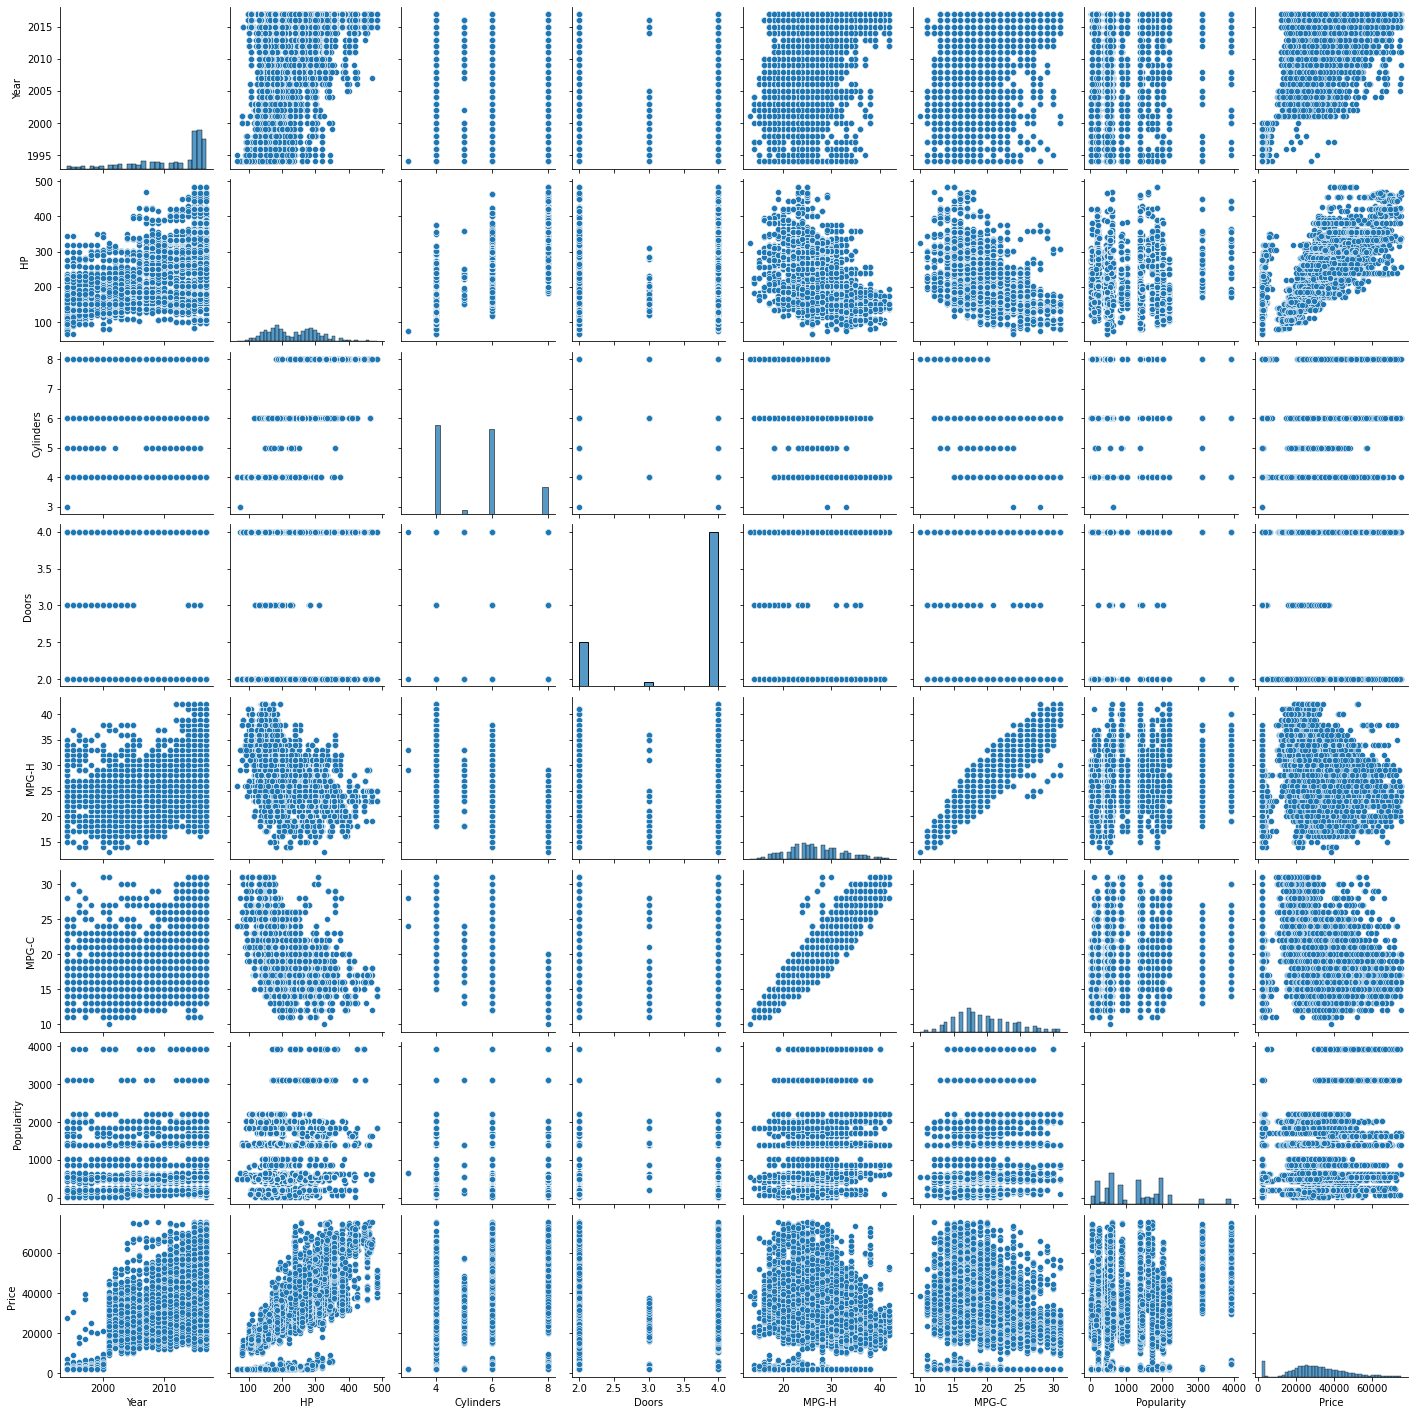

In [16]:
sns.pairplot(df)

In [17]:
scaler = MinMaxScaler()
df_n = scaler.fit_transform(df)
df_n = pd.DataFrame(df_n)
df_n

0         1    2    3         4         5         6         7
0     0.739130  0.642005  0.6  0.0  0.448276  0.428571  1.000000  0.602937
1     0.739130  0.558473  0.6  0.0  0.517241  0.428571  1.000000  0.528005
2     0.739130  0.558473  0.6  0.0  0.517241  0.476190  1.000000  0.469262
3     0.739130  0.391408  0.6  0.0  0.517241  0.380952  1.000000  0.375000
4     0.739130  0.391408  0.6  0.0  0.517241  0.380952  1.000000  0.443989
...        ...       ...  ...  ...       ...       ...       ...       ...
8462  0.782609  0.558473  0.6  1.0  0.344828  0.285714  0.046983  0.602732
8463  0.782609  0.558473  0.6  1.0  0.344828  0.285714  0.046983  0.746858
8464  0.782609  0.558473  0.6  1.0  0.344828  0.285714  0.046983  0.664208
8465  0.826087  0.558473  0.6  1.0  0.344828  0.285714  0.046983  0.668306
8466  0.521739  0.369928  0.6  1.0  0.448276  0.333333  0.010270  0.368784

[8467 rows x 8 columns]

Based on the correlation found above, the three features with the highest linear correlation with the output are chosen.

In [18]:
x = df_n.iloc[:, 0:3].values
y = df_n.iloc[:, 7].values
print(x.shape)
print(y.shape)

(8467, 3)
(8467,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5926, 3)
(2541, 3)
(5926,)
(2541,)


### **Normal Equation**

In [20]:
x_train1 = np.ones((x_train.shape[0], x_train.shape[1]+1)) 
x_train1[:,1:4] = x_train
print(x_train1)

[[1.         0.2173913  0.20047733 0.6       ]
 [1.         0.95652174 0.6372315  0.6       ]
 [1.         0.95652174 0.94033413 1.        ]
 ...
 [1.         0.91304348 0.24821002 0.2       ]
 [1.         0.52173913 0.17183771 0.2       ]
 [1.         0.86956522 0.34367542 0.2       ]]


In [21]:
x_t = np.transpose(x_train1)

In [22]:
theta = ((np.linalg.inv(x_t.dot(x_train1))).dot(x_t)).dot(y_train)
print(theta.shape)
print(theta)

(4,)
[-0.08877468  0.26965841  0.76785728 -0.05966062]


\begin{equation}
\hat{y} = θ_{0} + \theta_{1}x_1 + \theta_{2}x_2 + \theta_{3}x_3
\end{equation}
\begin{equation}
\hat{y} = -0.0887  + 0.2696 x_1 + 0.7678 x_2 - 0.0596 x_3
\end{equation}

In [23]:
pred = theta[0] + theta[1]*x_test[:,0] + theta[2]*x_test[:,1] + theta[3]*x_test[:,2]

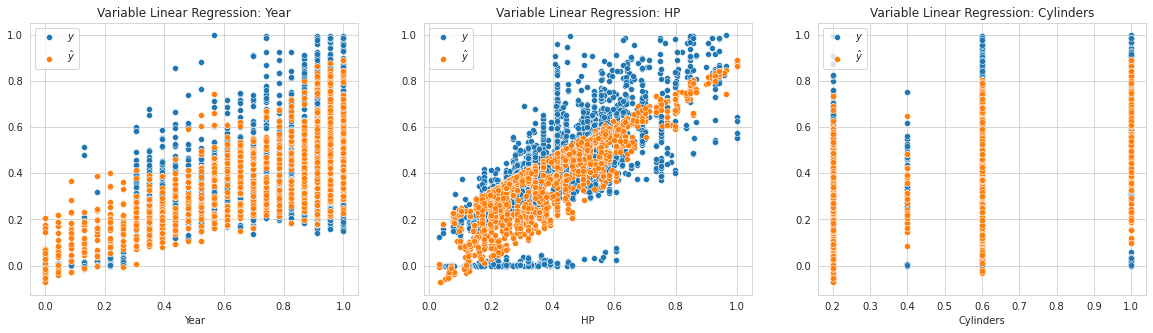

In [24]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_test, label='$y$').set(xlabel = df.columns[0], title ="Variable Linear Regression: "+ str(df.columns[0])) 
sns.scatterplot(ax=axes[0], x=x_test[:,0], y=pred, label='$\hat{y}$')

sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_test, label='$y$').set(xlabel = df.columns[1], title ="Variable Linear Regression: "+ str(df.columns[1])) 
sns.scatterplot(ax=axes[1], x=x_test[:,1], y=pred, label='$\hat{y}$')

sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_test, label='$y$').set(xlabel = df.columns[2], title ="Variable Linear Regression: "+ str(df.columns[2])) 
sns.scatterplot(ax=axes[2], x=x_test[:,2], y=pred, label='$\hat{y}$')

In [25]:
error_nor_eq = mse(y_test, pred)
print(error_nor_eq)

0.013366536684326831


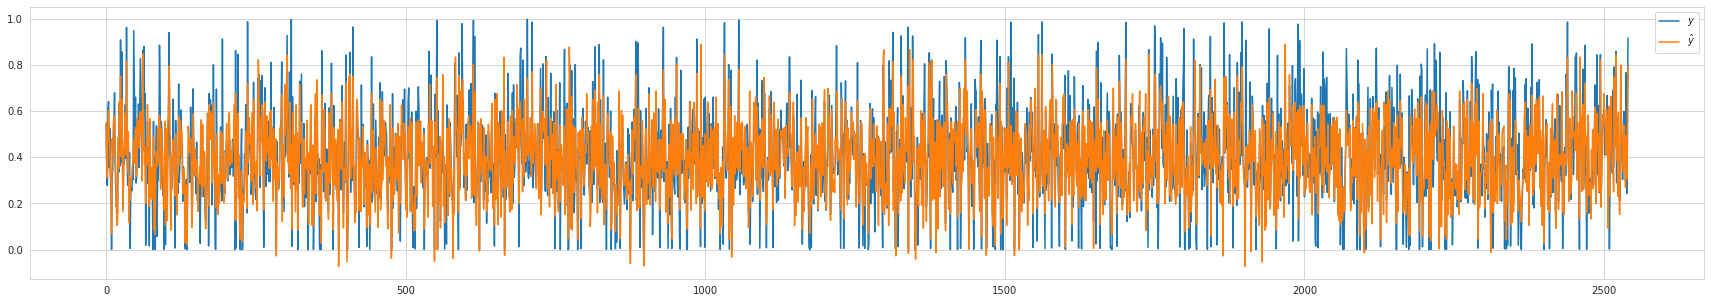

In [26]:
plt.figure(figsize = (30, 5))
plt.plot(y_test, label='$y$')
plt.plot(pred, label='$\hat{y}$')
plt.legend()
plt.show()

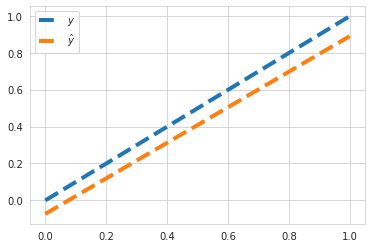

In [27]:
plt.plot([y_test.min(), y_test.max()], '--', lw=4, label='$y$')
plt.plot([pred.min(), pred.max()], '--', lw=4, label='$\hat{y}$')
plt.legend()
plt.show()

### **Scikit-Learn**

In [28]:
lr = LinearRegression()
reg = lr.fit(x_train, y_train) 

print(reg.coef_)
print(reg.intercept_)

[ 0.26965841  0.76785728 -0.05966062]
-0.08877467668205957


\begin{equation}
\hat{y} = θ_{0} + \theta_{1}x_1 + \theta_{2}x_2 + \theta_{3}x_3
\end{equation}

\begin{equation}
\hat{y} = -0.0887 + 0.2696x_1 + 0.7678x_2 - 0.0596x_3
\end{equation}

In [29]:
y_pred = lr.predict(x_test)

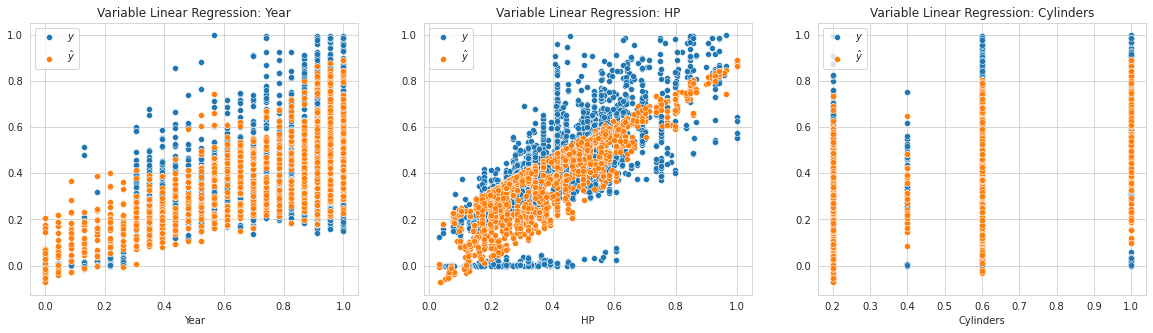

In [30]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_test, label='$y$').set(xlabel = df.columns[0], title ="Variable Linear Regression: "+ str(df.columns[0])) 
sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_pred, label='$\hat{y}$')

sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_test, label='$y$').set(xlabel = df.columns[1], title ="Variable Linear Regression: "+ str(df.columns[1])) 
sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_pred, label='$\hat{y}$')

sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_test, label='$y$').set(xlabel = df.columns[2], title ="Variable Linear Regression: "+ str(df.columns[2])) 
sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_pred, label='$\hat{y}$')

In [31]:
error_scikit = mse(y_test, y_pred)
print(error_scikit)

0.013366536684326843


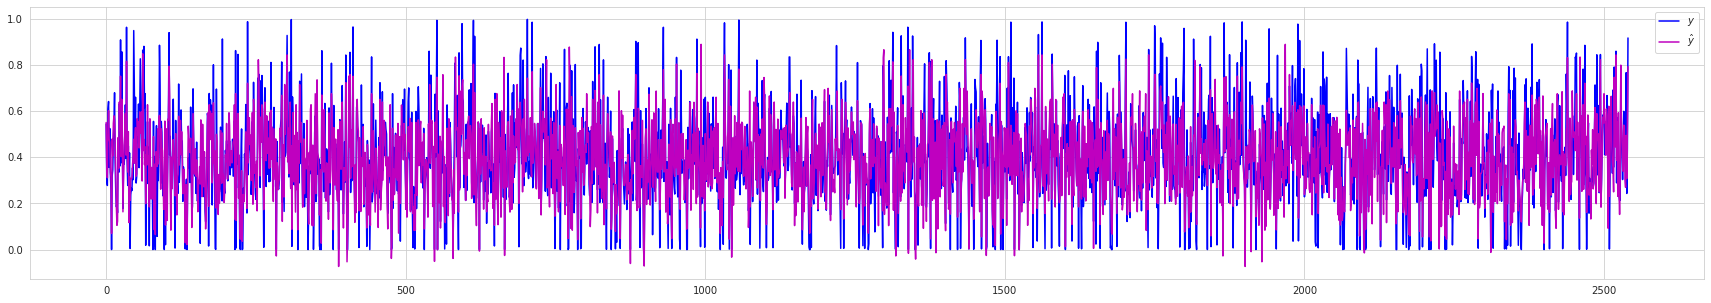

In [32]:
plt.figure(figsize = (30, 5))
plt.plot(y_test, 'b', label='$y$')
plt.plot(y_pred, 'm', label='$\hat{y}$')
plt.legend()
plt.show()

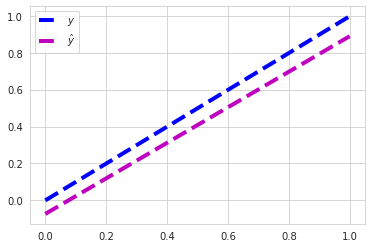

In [33]:
plt.plot([y_test.min(), y_test.max()], 'b--', lw=4, label='$y$')
plt.plot([y_pred.min(), y_pred.max()], 'm--', lw=4, label='$\hat{y}$')
plt.legend()
plt.show()

### **Gradient Descent**

We want to find the optimal values of $\theta$ considering 3 independent variables:

$$x_{k} = \begin{bmatrix}\theta_0\\ \theta_1\\ \theta_2\\ \theta_3\\ \end{bmatrix}$$

Replacing in the update equation:

$$\begin{bmatrix} \theta_{0_{k}}\\ \theta_{1_{k}}\\ \theta_{2_{k}}\\ \theta_{3_k}\end{bmatrix}= \begin{bmatrix} \theta_{0_{k-1}}\\ \theta_{1_{k-1}}\\ \theta_{2_{k-1}}\\ \theta_{3_{k-1}} \end{bmatrix}- \alpha \nabla MSE(\begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\\ \theta_{2_{k-1}}\\ \theta_{3_{k-1}}\end{bmatrix})$$


Replacing the gradient:

$$\begin{bmatrix}\theta_{0_k}\\ \theta_{1_k}\\ \theta_{2_k}\\ \theta_{3_k}\end{bmatrix}= \begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\\ \theta_{2_{k-1}}\\ \theta_{3_{k-1}}\end{bmatrix}- \alpha\frac{2}{m}x^T([θ_{0} + \theta_{1}x_1 + \theta_{2}x_2 + \theta_{3}x_3]-y)$$

In [34]:
theta = np.zeros(x_train.shape[1]+1)

alpha = 0.01 
n_steps = 1000 
m = x_train.shape[0] 

grads = []
thetas = []

for step in range(n_steps):
  A = (x_train1[:,0].dot(theta[0]) + x_train1[:,1].dot(theta[1]) + x_train1[:,2].dot(theta[2]) + x_train1[:,3].dot(theta[3]))
  B = A - y_train

  gradient = (2/m) * x_train1.T.dot(B) 

  theta = theta - alpha*gradient
  grads.append(gradient)
  thetas.append(theta)

print('Theta:', theta)
print('Gradient:', gradient)

Theta: [0.01139448 0.28500266 0.26750114 0.14292914]
Gradient: [ 0.01202379 -0.00782417 -0.01302855 -0.00065313]


\begin{equation}
\hat{y} = θ_{0} + \theta_{1}x_1 + \theta_{2}x_2 + \theta_{3}x_3
\end{equation}
\begin{equation}
\hat{y} = 0.0113 + 0.285x_1 + 0.2675x_2 + 0.1429x_3
\end{equation}

In [35]:
y_pred_grad = theta[0] + theta[1]*x_test[:,0] + theta[2]*x_test[:,1] + theta[3]*x_test[:,2]

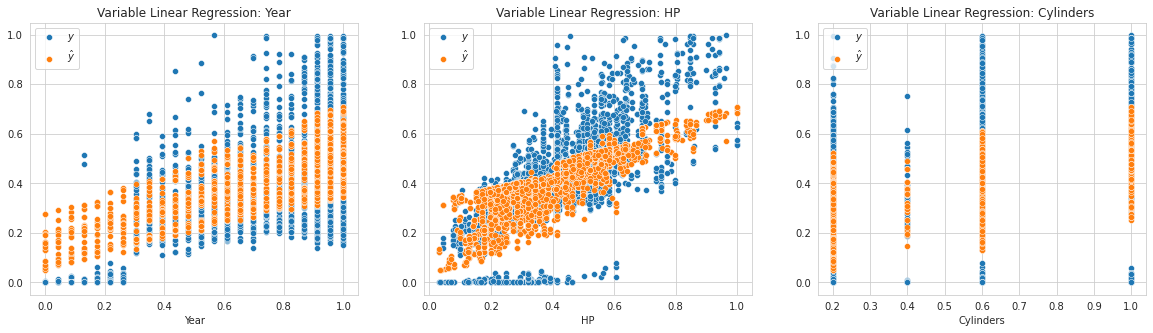

In [36]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_test, label='$y$').set(xlabel = df.columns[0], title ="Variable Linear Regression: "+ str(df.columns[0])) 
sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_pred_grad, label='$\hat{y}$')

sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_test, label='$y$').set(xlabel = df.columns[1], title ="Variable Linear Regression: "+ str(df.columns[1])) 
sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_pred_grad, label='$\hat{y}$')

sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_test, label='$y$').set(xlabel = df.columns[2], title ="Variable Linear Regression: "+ str(df.columns[2])) 
sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_pred_grad, label='$\hat{y}$')

In [37]:
error_grad = mse(y_test, y_pred_grad)
print(error_grad)

0.017387376040336203


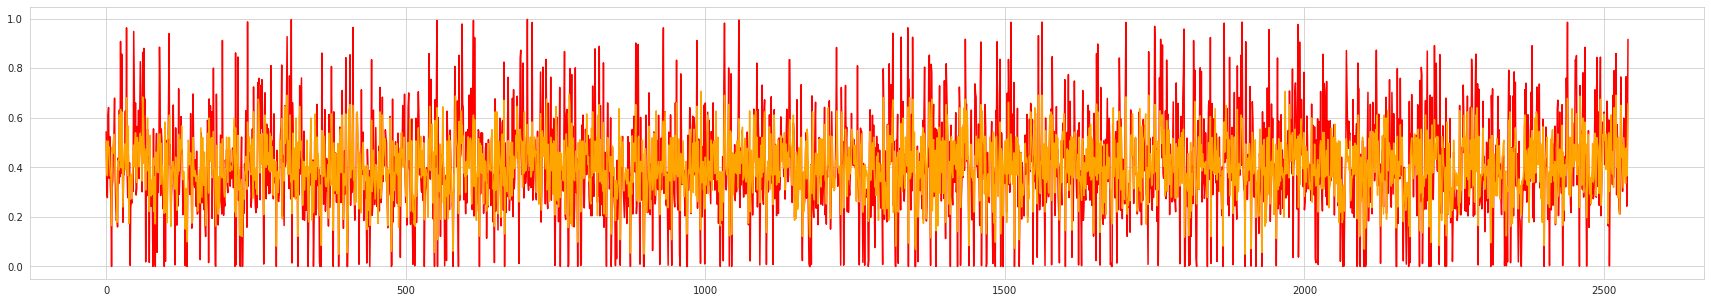

In [38]:
plt.figure(figsize = (30, 5))
plt.plot(np.array(y_test), 'r', label='$y$')
plt.plot(np.array(y_pred_grad), 'orange', label='$\hat{y}$')

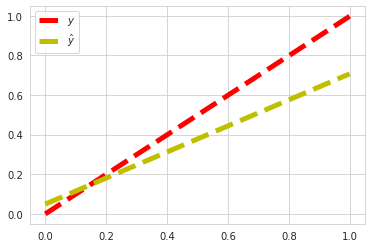

In [39]:
plt.plot([y_test.min(), y_test.max()], 'r--', lw=5,label='$y$')
plt.plot([y_pred_grad.min(), y_pred_grad.max()], 'y--', lw=5,label='$\hat{y}$')
plt.legend()
plt.show()

### **Decision Trees**

In [40]:
dt_regressor = DecisionTreeRegressor(max_depth=8)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

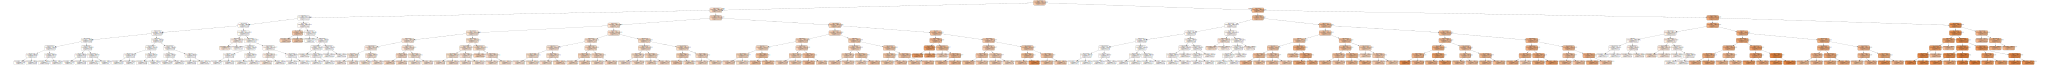

In [41]:
export_graphviz(dt_regressor, out_file="dt_regressor.dot", filled=True, rounded=True, 
                special_characters=True)

with open("dt_regressor.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [42]:
pred_dt = dt_regressor.predict(x_test)
pred_dt

array([0.62414517, 0.31876774, 0.28421823, ..., 0.25677463, 0.45638506,
       0.94398907])

In [43]:
y_test

array([0.54371585, 0.30321038, 0.27766393, ..., 0.24310109, 0.43954918,
       0.91666667])

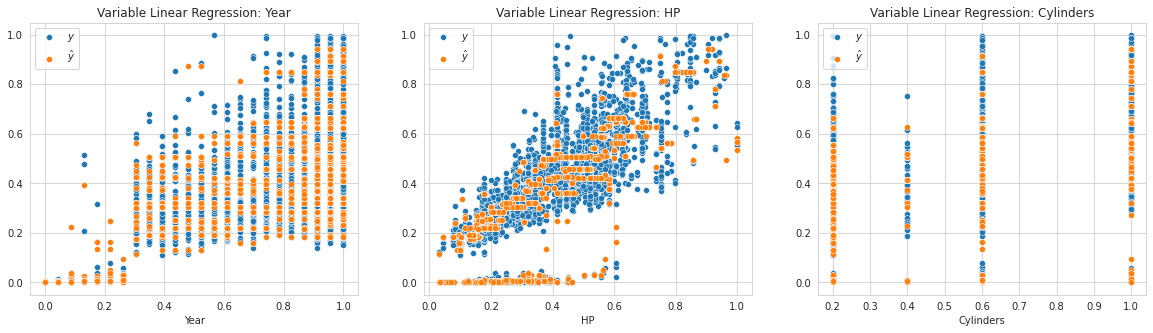

In [44]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(ax=axes[0], x=x_test[:,0], y=y_test, label='$y$').set(xlabel = df.columns[0], title ="Variable Linear Regression: "+ str(df.columns[0])) 
sns.scatterplot(ax=axes[0], x=x_test[:,0], y=pred_dt, label='$\hat{y}$')

sns.scatterplot(ax=axes[1], x=x_test[:,1], y=y_test, label='$y$').set(xlabel = df.columns[1], title ="Variable Linear Regression: "+ str(df.columns[1])) 
sns.scatterplot(ax=axes[1], x=x_test[:,1], y=pred_dt, label='$\hat{y}$')

sns.scatterplot(ax=axes[2], x=x_test[:,2], y=y_test, label='$y$').set(xlabel = df.columns[2], title ="Variable Linear Regression: "+ str(df.columns[2])) 
sns.scatterplot(ax=axes[2], x=x_test[:,2], y=pred_dt, label='$\hat{y}$')

In [45]:
error_dt = mse(y_test, pred_dt)
print(error_dt)

0.007364860927919397


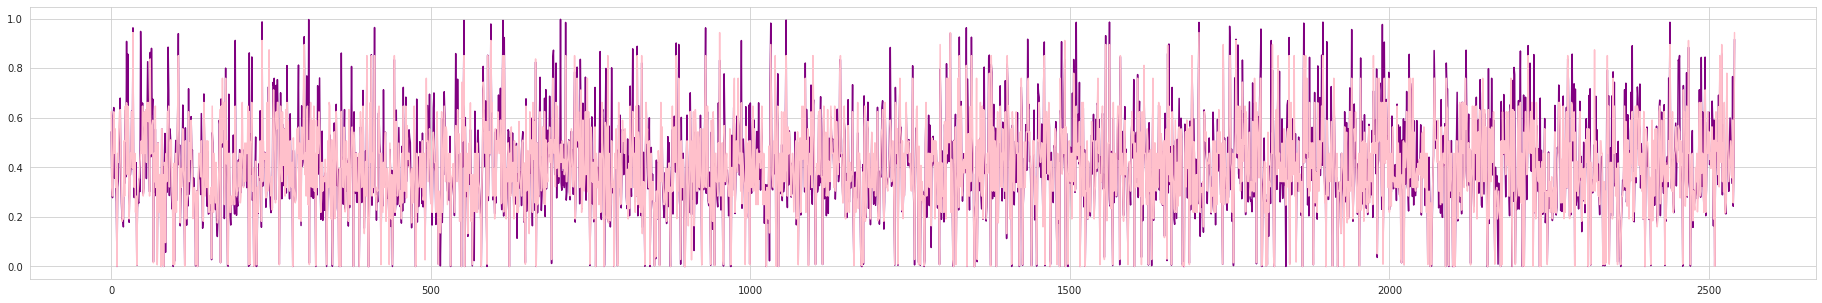

In [46]:
plt.figure(figsize = (32, 5))
plt.plot(np.array(y_test), 'purple', label='$y$')
plt.plot(np.array(pred_dt), 'pink', label='$\hat{y}$')

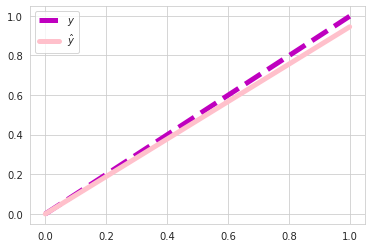

In [47]:
plt.plot([y_test.min(), y_test.max()], 'm--', lw=5,label='$y$')
plt.plot([pred_dt.min(), pred_dt.max()], 'pink', lw=5,label='$\hat{y}$')
plt.legend()
plt.show()

## **CLASSIFICATION**

### **Libraries**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### **Dataset and Exploratory Data Analysis (for supervised learning algorithms)**

In [49]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
df1 = pd.read_csv(url, header=None)
df1.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df1

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [51]:
df1.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [52]:
df1.shape

(1372, 5)

In [53]:
duplicate_rows1 = df1[df1.duplicated()]
print("Number of duplicate rows: ", duplicate_rows1.shape)

Number of duplicate rows:  (24, 5)


In [54]:
df1 = df1.drop_duplicates()
df1.shape

(1348, 5)

In [55]:
print(df1.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [56]:
Q1_1 = df1.quantile(0.25)
Q3_1 = df1.quantile(0.75)
IQR_1 = Q3_1 - Q1_1
print(IQR_1)

variance    4.639900
skewness    8.423025
curtosis    4.745400
entropy     2.796963
class       1.000000
dtype: float64


In [57]:
#All data below the 25th quartile and above the 75th quartile are eliminated. 

df1 = df1[~((df1 < (Q1_1 - 1.5 * IQR_1)) | (df1 > (Q3_1 + 1.5 * IQR_1))).any(axis=1)]
df1.shape

(1257, 5)

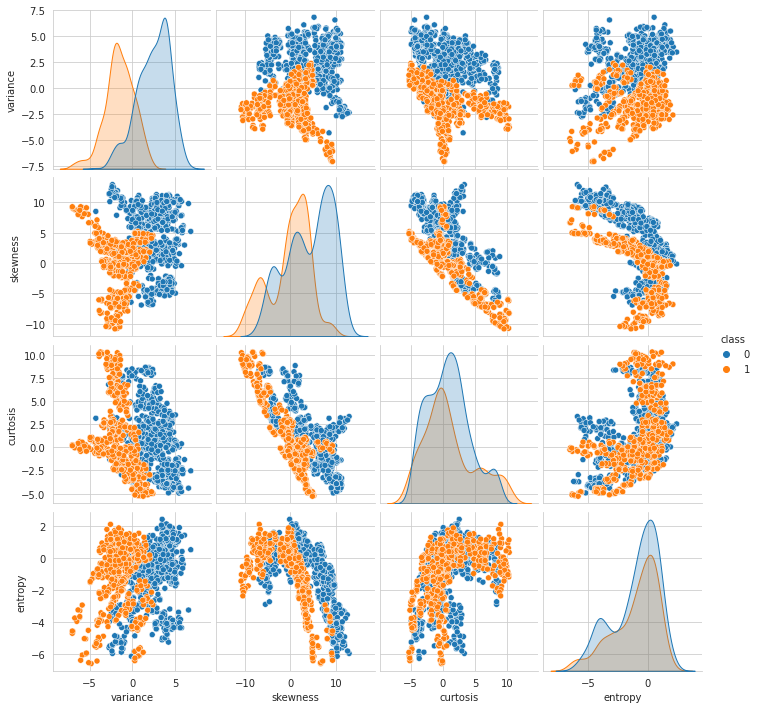

In [58]:
sns.pairplot(df1, hue='class')

In [59]:
x_1 = df1.iloc[:, :-1].values
y_1 = df1.iloc[:, -1].values
print(x_1.shape)
print(y_1.shape)

(1257, 4)
(1257,)


In [60]:
scaler = MinMaxScaler(feature_range=(-1,1))
x_1n = scaler.fit_transform(x_1)
x_1n = pd.DataFrame(x_1n)
x_1n

0         1         2         3
0     0.538008  0.640169 -0.681987  0.358261
1     0.671318  0.598296 -0.637251  0.133355
2     0.573257 -0.309003 -0.074968  0.480880
3     0.514210  0.712101 -0.836439 -0.339072
4     0.063156 -0.461559  0.264701  0.238219
...        ...       ...       ...       ...
1252 -0.152601 -0.207019  0.053312  0.603786
1253 -0.331920  0.226827 -0.373423  0.170311
1254  0.074247  0.025807 -0.507868  0.333336
1255 -0.184619 -0.497000  0.509176  0.533021
1256 -0.350944 -0.142731  0.022535  0.722100

[1257 rows x 4 columns]

In [61]:
x_train_n, x_test_n, y_train1, y_test1 = train_test_split(x_1n, y_1, test_size=0.3)
print(x_train_n.shape)
print(x_test_n.shape)
print(y_train1.shape)
print(y_test1.shape)

(879, 4)
(378, 4)
(879,)
(378,)


### **Perceptron**

Supervised Learning Algorithm for Binary Classification

In [62]:
perc = Perceptron()
perc.fit(x_train_n, y_train1)

Perceptron()

In [63]:
pred_perc = perc.predict(x_test_n)
print(pred_perc)

[1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 1]


In [64]:
print(y_test1)

[1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0]


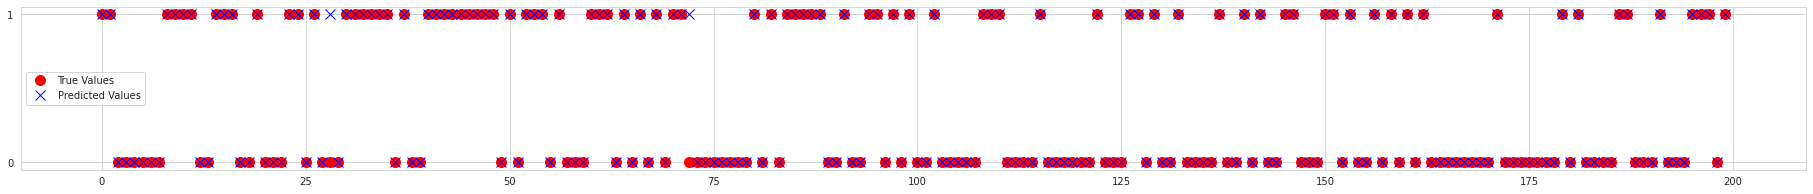

In [65]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_perc[:200])), pred_perc[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

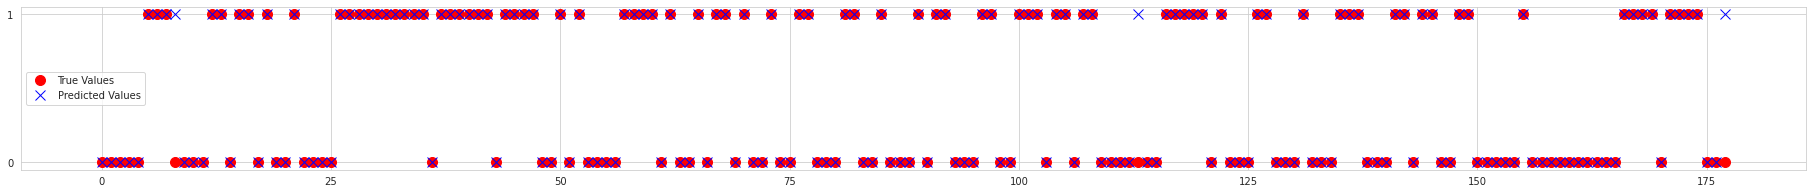

In [66]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_perc[200:379])), pred_perc[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

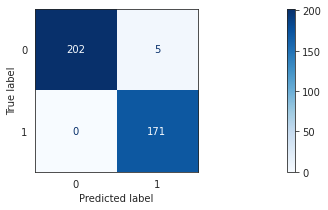

In [67]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, pred_perc, cmap='Blues')
plt.show()

In [68]:
accuracy_model = metrics.accuracy_score(y_test1, pred_perc)
print("Accuracy: ", accuracy_model)

Accuracy:  0.9867724867724867


In [69]:
conf_mat = metrics.confusion_matrix(y_test1, pred_perc)
print(metrics.classification_report(y_test1, pred_perc))

TN = conf_mat[0,0]
TP = conf_mat[1,1]
FN = conf_mat[1,0] 
FP = conf_mat[0,1]
print('TN: ', TN,'  TP: ', TP,'  FN: ', FN,'  FP: ', FP)

sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity:', sensitivity)
print('specificity:', specificity)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       207
           1       0.97      1.00      0.99       171

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378

TN:  202   TP:  171   FN:  0   FP:  5
sensitivity: 1.0
specificity: 0.9758454106280193


### **Logistic Regression**

Supervised Learning Algorithm for Binary Classification

In [70]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train_n, y_train1)

LogisticRegression()

In [71]:
pred_logistic = model_logistic.predict(x_test_n)
print("Predicted output:\n", pred_logistic)
print("Validation output:\n", y_test1)

Predicted output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0]
Validation output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 

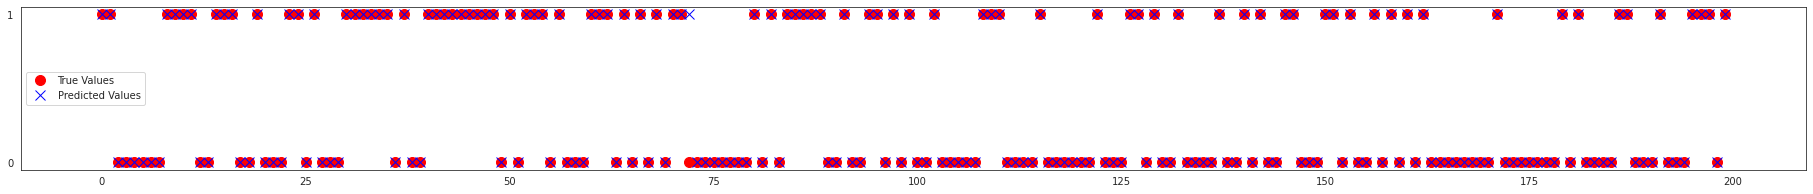

In [72]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_logistic[:200])), pred_logistic[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

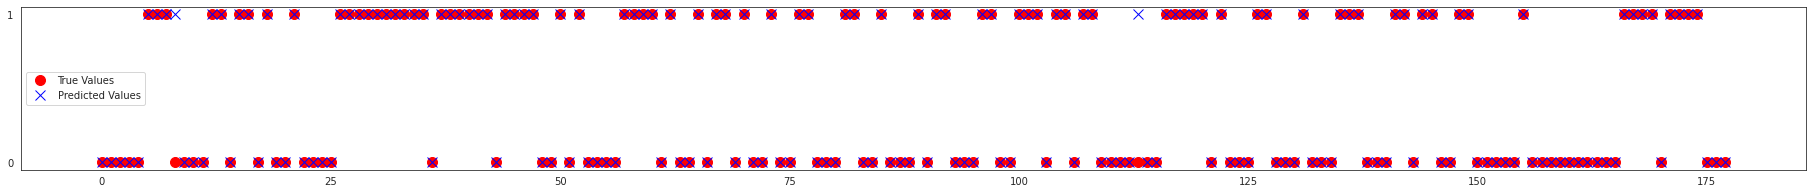

In [73]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_logistic[200:379])), pred_logistic[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

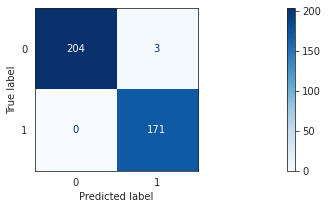

In [74]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, pred_logistic, cmap='Blues')
plt.show()

In [75]:
accuracy_model_lr = metrics.accuracy_score(y_test1, pred_logistic)
print("Accuracy: ", accuracy_model_lr)

Accuracy:  0.9920634920634921


In [76]:
conf_mat1 = metrics.confusion_matrix(y_test1, pred_logistic)
print(metrics.classification_report(y_test1, pred_logistic))

TN1 = conf_mat1[0,0]
TP1 = conf_mat1[1,1]
FN1 = conf_mat1[1,0] 
FP1 = conf_mat1[0,1]
print('TN: ', TN1,'  TP: ', TP1,'  FN: ', FN1,'  FP: ', FP1)

sensitivity1 = TP1/(TP1+FN1)
specificity1 = TN1/(TN1+FP1)
print('sensitivity:', sensitivity1)
print('specificity:', specificity1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       0.98      1.00      0.99       171

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378

TN:  204   TP:  171   FN:  0   FP:  3
sensitivity: 1.0
specificity: 0.9855072463768116


### **Support Vector Machine (SVM)**

Supervised Learning Algorithm for Binary Classification

In [77]:
svc = LinearSVC(C=100, loss='hinge')
svc.fit(x_train_n, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, loss='hinge')

In [78]:
predict = svc.predict(x_test_n)

In [79]:
print("Validation output:\n", y_test1)
print("Predicted output:\n", predict)

Validation output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0]
Predicted output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 

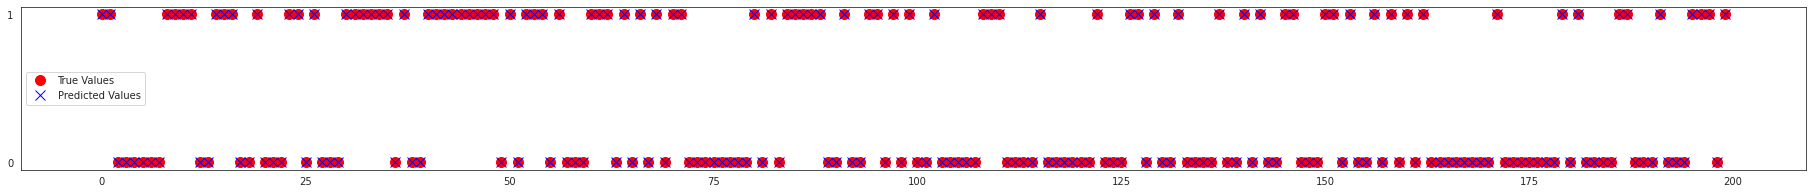

In [80]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict[:200])), predict[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

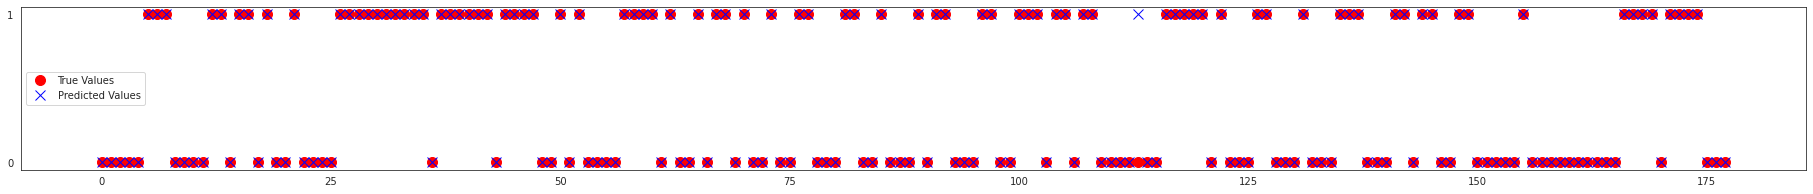

In [81]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict[200:379])), predict[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

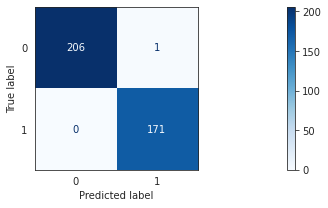

In [82]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, predict, cmap='Blues')
plt.show()

In [83]:
accuracy_model_svc = metrics.accuracy_score(y_test1, predict)
print("Accuracy: ", accuracy_model_svc)

Accuracy:  0.9973544973544973


In [84]:
conf_mat2 = metrics.confusion_matrix(y_test1, predict)
print(metrics.classification_report(y_test1, predict))

TN2 = conf_mat2[0,0]
TP2 = conf_mat2[1,1]
FN2 = conf_mat2[1,0] 
FP2 = conf_mat2[0,1]
print('TN: ', TN2,'  TP: ', TP2,'  FN: ', FN2,'  FP: ', FP2)

sensitivity2 = TP2/(TP2+FN2)
specificity2 = TN2/(TN2+FP2)
print('sensitivity:', sensitivity2)
print('specificity:', specificity2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       0.99      1.00      1.00       171

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

TN:  206   TP:  171   FN:  0   FP:  1
sensitivity: 1.0
specificity: 0.9951690821256038


### **Kernel SVM**

Supervised Learning Algorithm for Binary Classification and nonlinearly separable problems.

In [85]:
svk = SVC(kernel='poly', degree=3, coef0=1, C=5)
svk.fit(x_train_n, y_train1)

SVC(C=5, coef0=1, kernel='poly')

In [86]:
predict_svk = svk.predict(x_test_n)

print("Validation output:\n", y_test1)
print("Predicted output:\n", predict_svk)

Validation output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0]
Predicted output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 

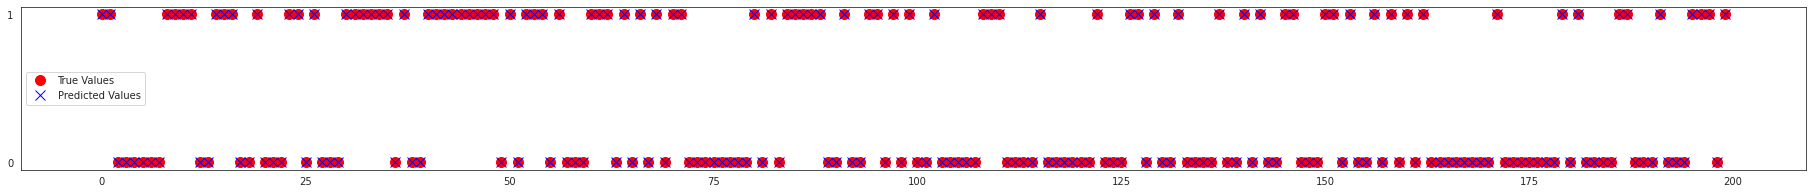

In [87]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict_svk[:200])), predict_svk[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

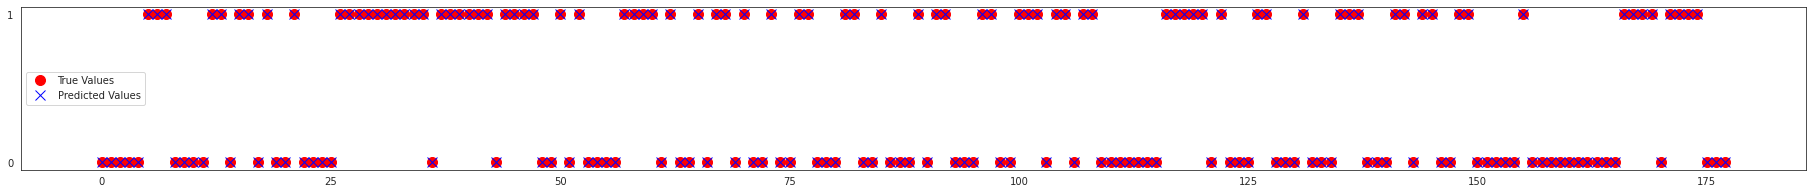

In [88]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict_svk[200:379])), predict_svk[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

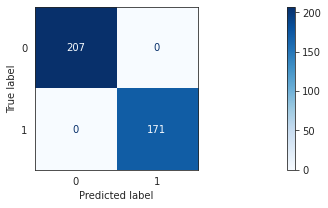

In [89]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, predict_svk, cmap='Blues')
plt.show()

In [90]:
accuracy_model_svk = metrics.accuracy_score(y_test1, predict_svk)
print("Accuracy: ", accuracy_model_svk)

Accuracy:  1.0


In [91]:
conf_mat3 = metrics.confusion_matrix(y_test1, predict_svk)
print(metrics.classification_report(y_test1, predict_svk))

TN3 = conf_mat3[0,0]
TP3 = conf_mat3[1,1]
FN3 = conf_mat3[1,0] 
FP3 = conf_mat3[0,1]
print('TN: ', TN3,'  TP: ', TP3,'  FN: ', FN3,'  FP: ', FP3)

sensitivity3 = TP3/(TP3+FN3)
specificity3 = TN3/(TN3+FP3)
print('sensitivity:', sensitivity3)
print('specificity:', specificity3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       171

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

TN:  207   TP:  171   FN:  0   FP:  0
sensitivity: 1.0
specificity: 1.0


### **K-Nearest Neighbors (KNN)**

Supervised Learning Algorithm for Binary or Multiclass Classification.

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_n, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [93]:
predict_knn = knn.predict(x_test_n)

print("Validation output:\n", y_test1)
print("Predicted output:\n", predict_knn)

Validation output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0]
Predicted output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 

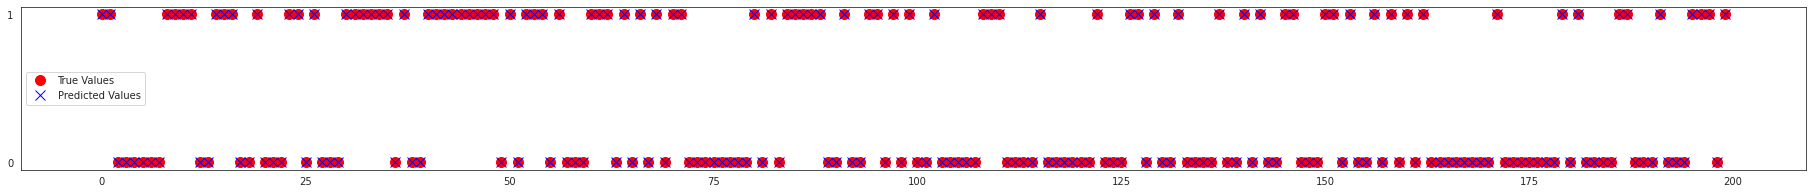

In [94]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict_knn[:200])), predict_knn[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

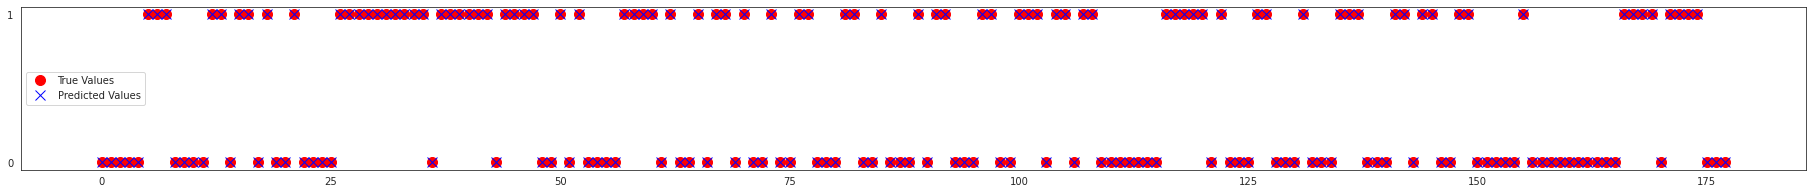

In [95]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(predict_knn[200:379])), predict_knn[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

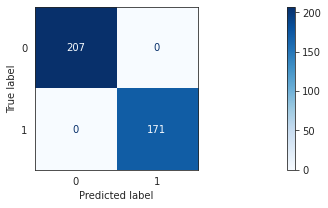

In [96]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, predict_knn, cmap='Blues')
plt.show()

In [97]:
accuracy_model_knn = metrics.accuracy_score(y_test1, predict_knn)
print("Accuracy: ", accuracy_model_knn)

Accuracy:  1.0


In [98]:
conf_mat4 = metrics.confusion_matrix(y_test1, predict_knn)
print(metrics.classification_report(y_test1, predict_knn))

TN4 = conf_mat4[0,0]
TP4 = conf_mat4[1,1]
FN4 = conf_mat4[1,0] 
FP4 = conf_mat4[0,1]
print('TN: ', TN4,'  TP: ', TP4,'  FN: ', FN4,'  FP: ', FP4)

sensitivity4 = TP4/(TP4+FN4)
specificity4 = TN4/(TN4+FP4)
print('sensitivity:', sensitivity4)
print('specificity:', specificity4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       171

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

TN:  207   TP:  171   FN:  0   FP:  0
sensitivity: 1.0
specificity: 1.0


### **Decision Trees**

Supervised Learning Algorithm for Binary or Multiclass Classification.

In [99]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train_n, y_train1)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train_n, y_train1)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test_n, y_test1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.984


In [100]:
export_graphviz(tree, out_file="tree.dot", class_names=["class_0", "class_1"],
                feature_names=df1.columns[0:4], impurity=False, filled=True)

In [101]:
!dot -Tpng /content/tree.dot -o /content/tree.png

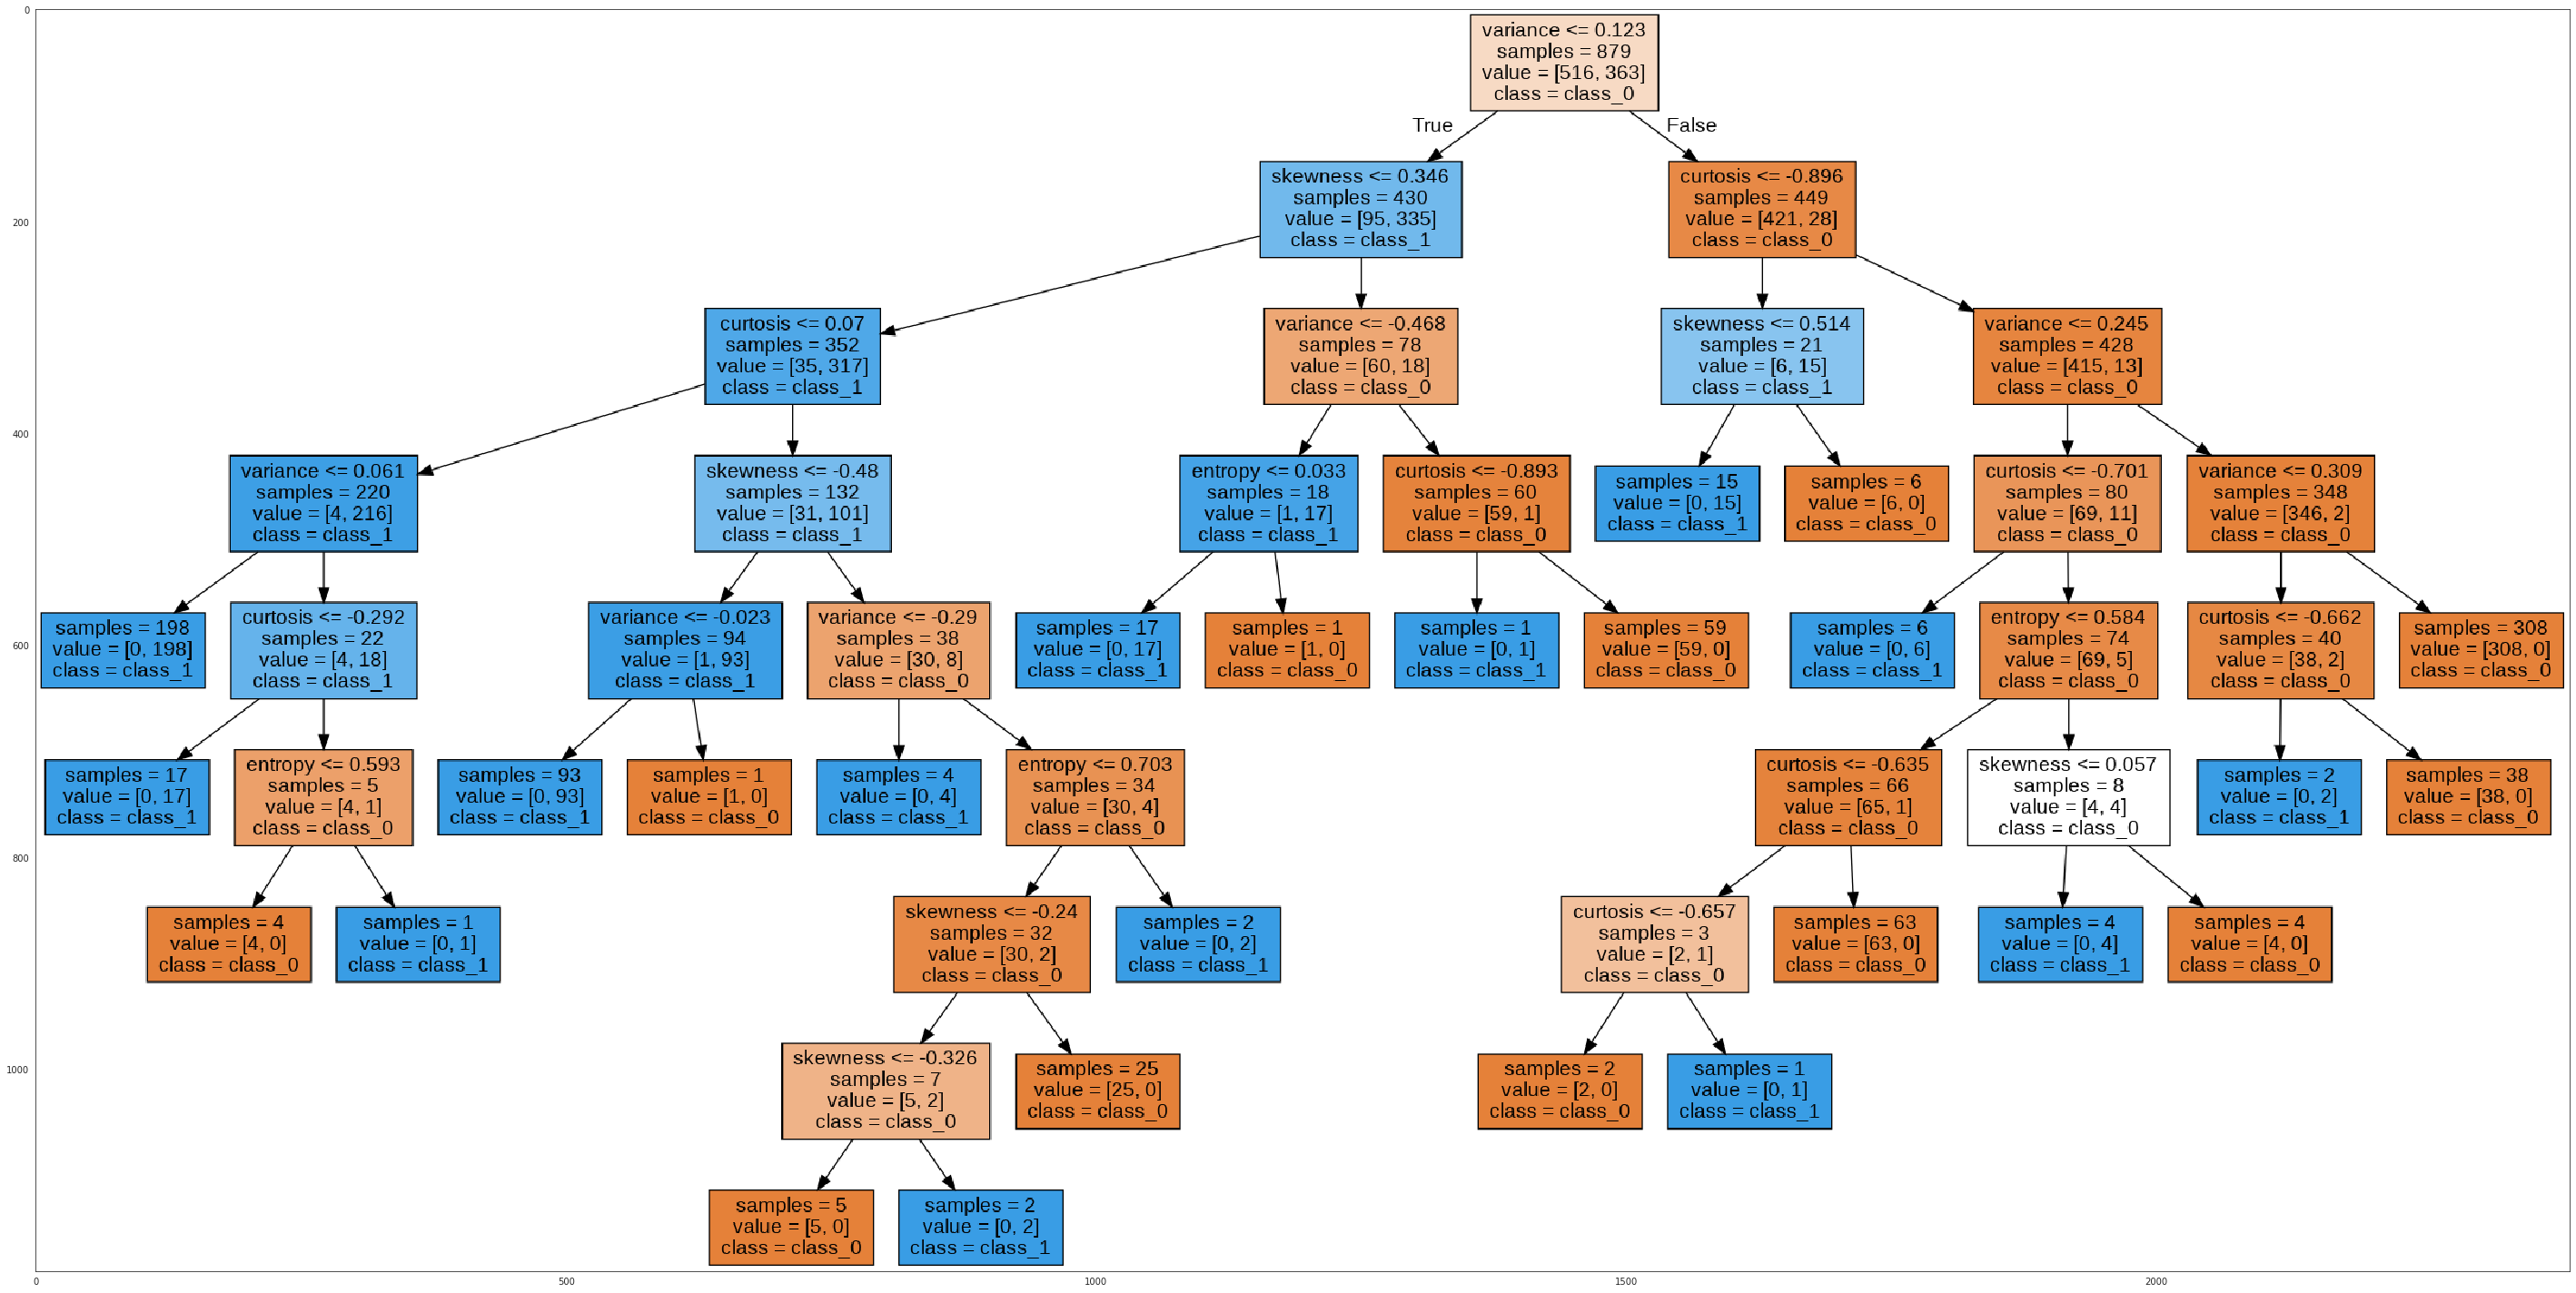

In [102]:
tree_viz = plt.imread('/content/tree.png')
plt.figure(figsize = (50,50))
plt.imshow(tree_viz, interpolation='nearest')
plt.show()

In [103]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.61190863 0.24975508 0.11451481 0.02382148]


In [104]:
pred_dt_class = tree.predict(x_test_n)
print("Predicted output:\n", pred_dt_class)
print("Validation output:\n", y_test1)

Predicted output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 1 1 0 0 0]
Validation output:
 [1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 

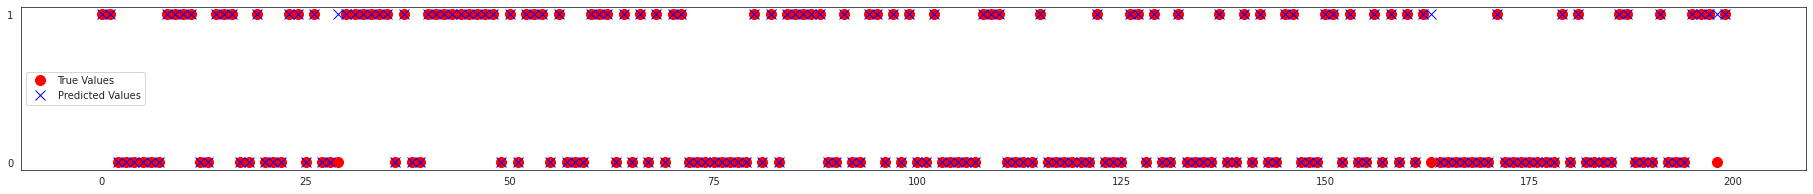

In [105]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[:200])), y_test1[:200], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_dt_class[:200])), pred_dt_class[:200], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

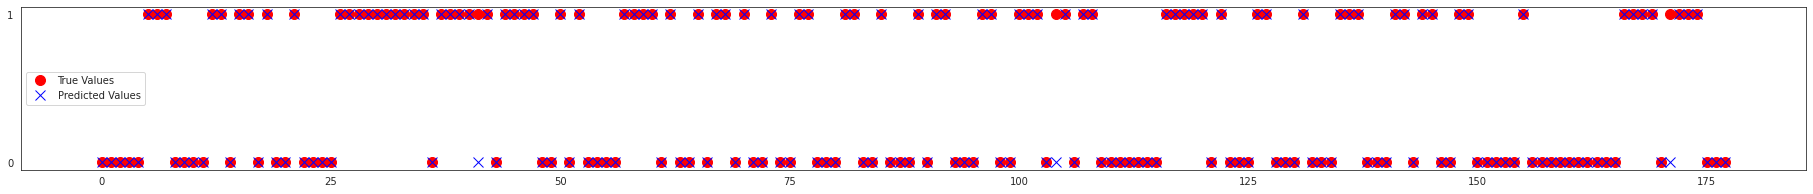

In [106]:
plt.rcParams['figure.figsize'] = [32, 3]
plt.plot(range(len(y_test1[200:379])), y_test1[200:379], 'ro', markersize=10, label='True Values')
plt.plot(range(len(pred_dt_class[200:379])), pred_dt_class[200:379], 'bx', markersize=10, label='Predicted Values')
plt.yticks([0,1])
plt.legend(loc='center left')

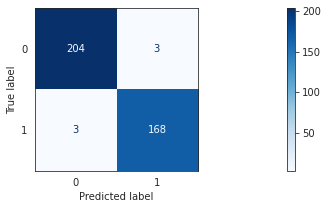

In [107]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(y_test1, pred_dt_class, cmap='Blues')
plt.show()

In [108]:
accuracy_model_dt = metrics.accuracy_score(y_test1, pred_dt_class)
print("Accuracy: ", accuracy_model_dt)

Accuracy:  0.9841269841269841


In [109]:
conf_mat5 = metrics.confusion_matrix(y_test1, pred_dt_class)
print(metrics.classification_report(y_test1, pred_dt_class))

TN5 = conf_mat5[0,0]
TP5 = conf_mat5[1,1]
FN5 = conf_mat5[1,0] 
FP5 = conf_mat5[0,1]
print('TN: ', TN5,'  TP: ', TP5,'  FN: ', FN5,'  FP: ', FP5)

sensitivity5 = TP5/(TP5+FN5)
specificity5 = TN5/(TN5+FP5)
print('sensitivity:', sensitivity5)
print('specificity:', specificity5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       207
           1       0.98      0.98      0.98       171

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378

TN:  204   TP:  168   FN:  3   FP:  3
sensitivity: 0.9824561403508771
specificity: 0.9855072463768116


### **Dataset and Exploratory Data Analysis (for unsupervised learning algorithms)**

In [110]:
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url1, header=None)
df_wine.columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                   'Nonflavanoid', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD_diluted', 'Proline']
df_wine

Class  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   
..     ...      ...         ...   ...         ...        ...            ...   
173      3    13.71        5.65  2.45        20.5         95           1.68   
174      3    13.40        3.91  2.48        23.0        102           1.80   
175      3    13.27        4.28  2.26        20.0        120           1.59   
176      3    13.17        2.59  2.37        20.0        120           1.65   
177      3    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid  Proanthocyanins  Color_intensity   Hue  \
0          3.06          0.28             2.29             5.64  1.04   
1          2.76          0.26             1.28             4.38  1.05   
2          3.24          0.30             2.81             5.68  1.03   
3          3.49          0.24             2.18             7.80  0.86   
4          2.69          0.39             1.82             4.32  1.04   
..          ...           ...              ...              ...   ...   
173        0.61          0.52             1.06             7.70  0.64   
174        0.75          0.43             1.41             7.30  0.70   
175        0.69          0.43             1.35            10.20  0.59   
176        0.68          0.53             1.46             9.30  0.60   
177        0.76          0.56             1.35             9.20  0.61   

     OD_diluted  Proline  
0          3.92     1065  
1          3.40     1050  
2          3.17     1185  
3          3.45     1480  
4          2.93      735  
..          ...      ...  
173        1.74      740  
174        1.56      750  
175        1.56      835  
176        1.62      840  
177        1.60      560  

[178 rows x 14 columns]

In [111]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic_acid       178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Total_phenols    178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color_intensity  178 non-null    float64
 11  Hue              178 non-null    float64
 12  OD_diluted       178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [112]:
df_wine.describe()

Class     Alcohol  Malic_acid         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid  Proanthocyanins  \
count     178.000000  178.000000    178.000000       178.000000   
mean        2.295112    2.029270      0.361854         1.590899   
std         0.625851    0.998859      0.124453         0.572359   
min         0.980000    0.340000      0.130000         0.410000   
25%         1.742500    1.205000      0.270000         1.250000   
50%         2.355000    2.135000      0.340000         1.555000   
75%         2.800000    2.875000      0.437500         1.950000   
max         3.880000    5.080000      0.660000         3.580000   

       Color_intensity         Hue  OD_diluted      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [113]:
df_wine.shape

(178, 14)

In [114]:
duplicate_rows2 = df_wine[df_wine.duplicated()]
print("Number of duplicate rows: ", duplicate_rows2.shape)

Number of duplicate rows:  (0, 14)


In [115]:
print(df_wine.isnull().sum())

Class              0
Alcohol            0
Malic_acid         0
Ash                0
Alcalinity         0
Magnesium          0
Total_phenols      0
Flavanoids         0
Nonflavanoid       0
Proanthocyanins    0
Color_intensity    0
Hue                0
OD_diluted         0
Proline            0
dtype: int64


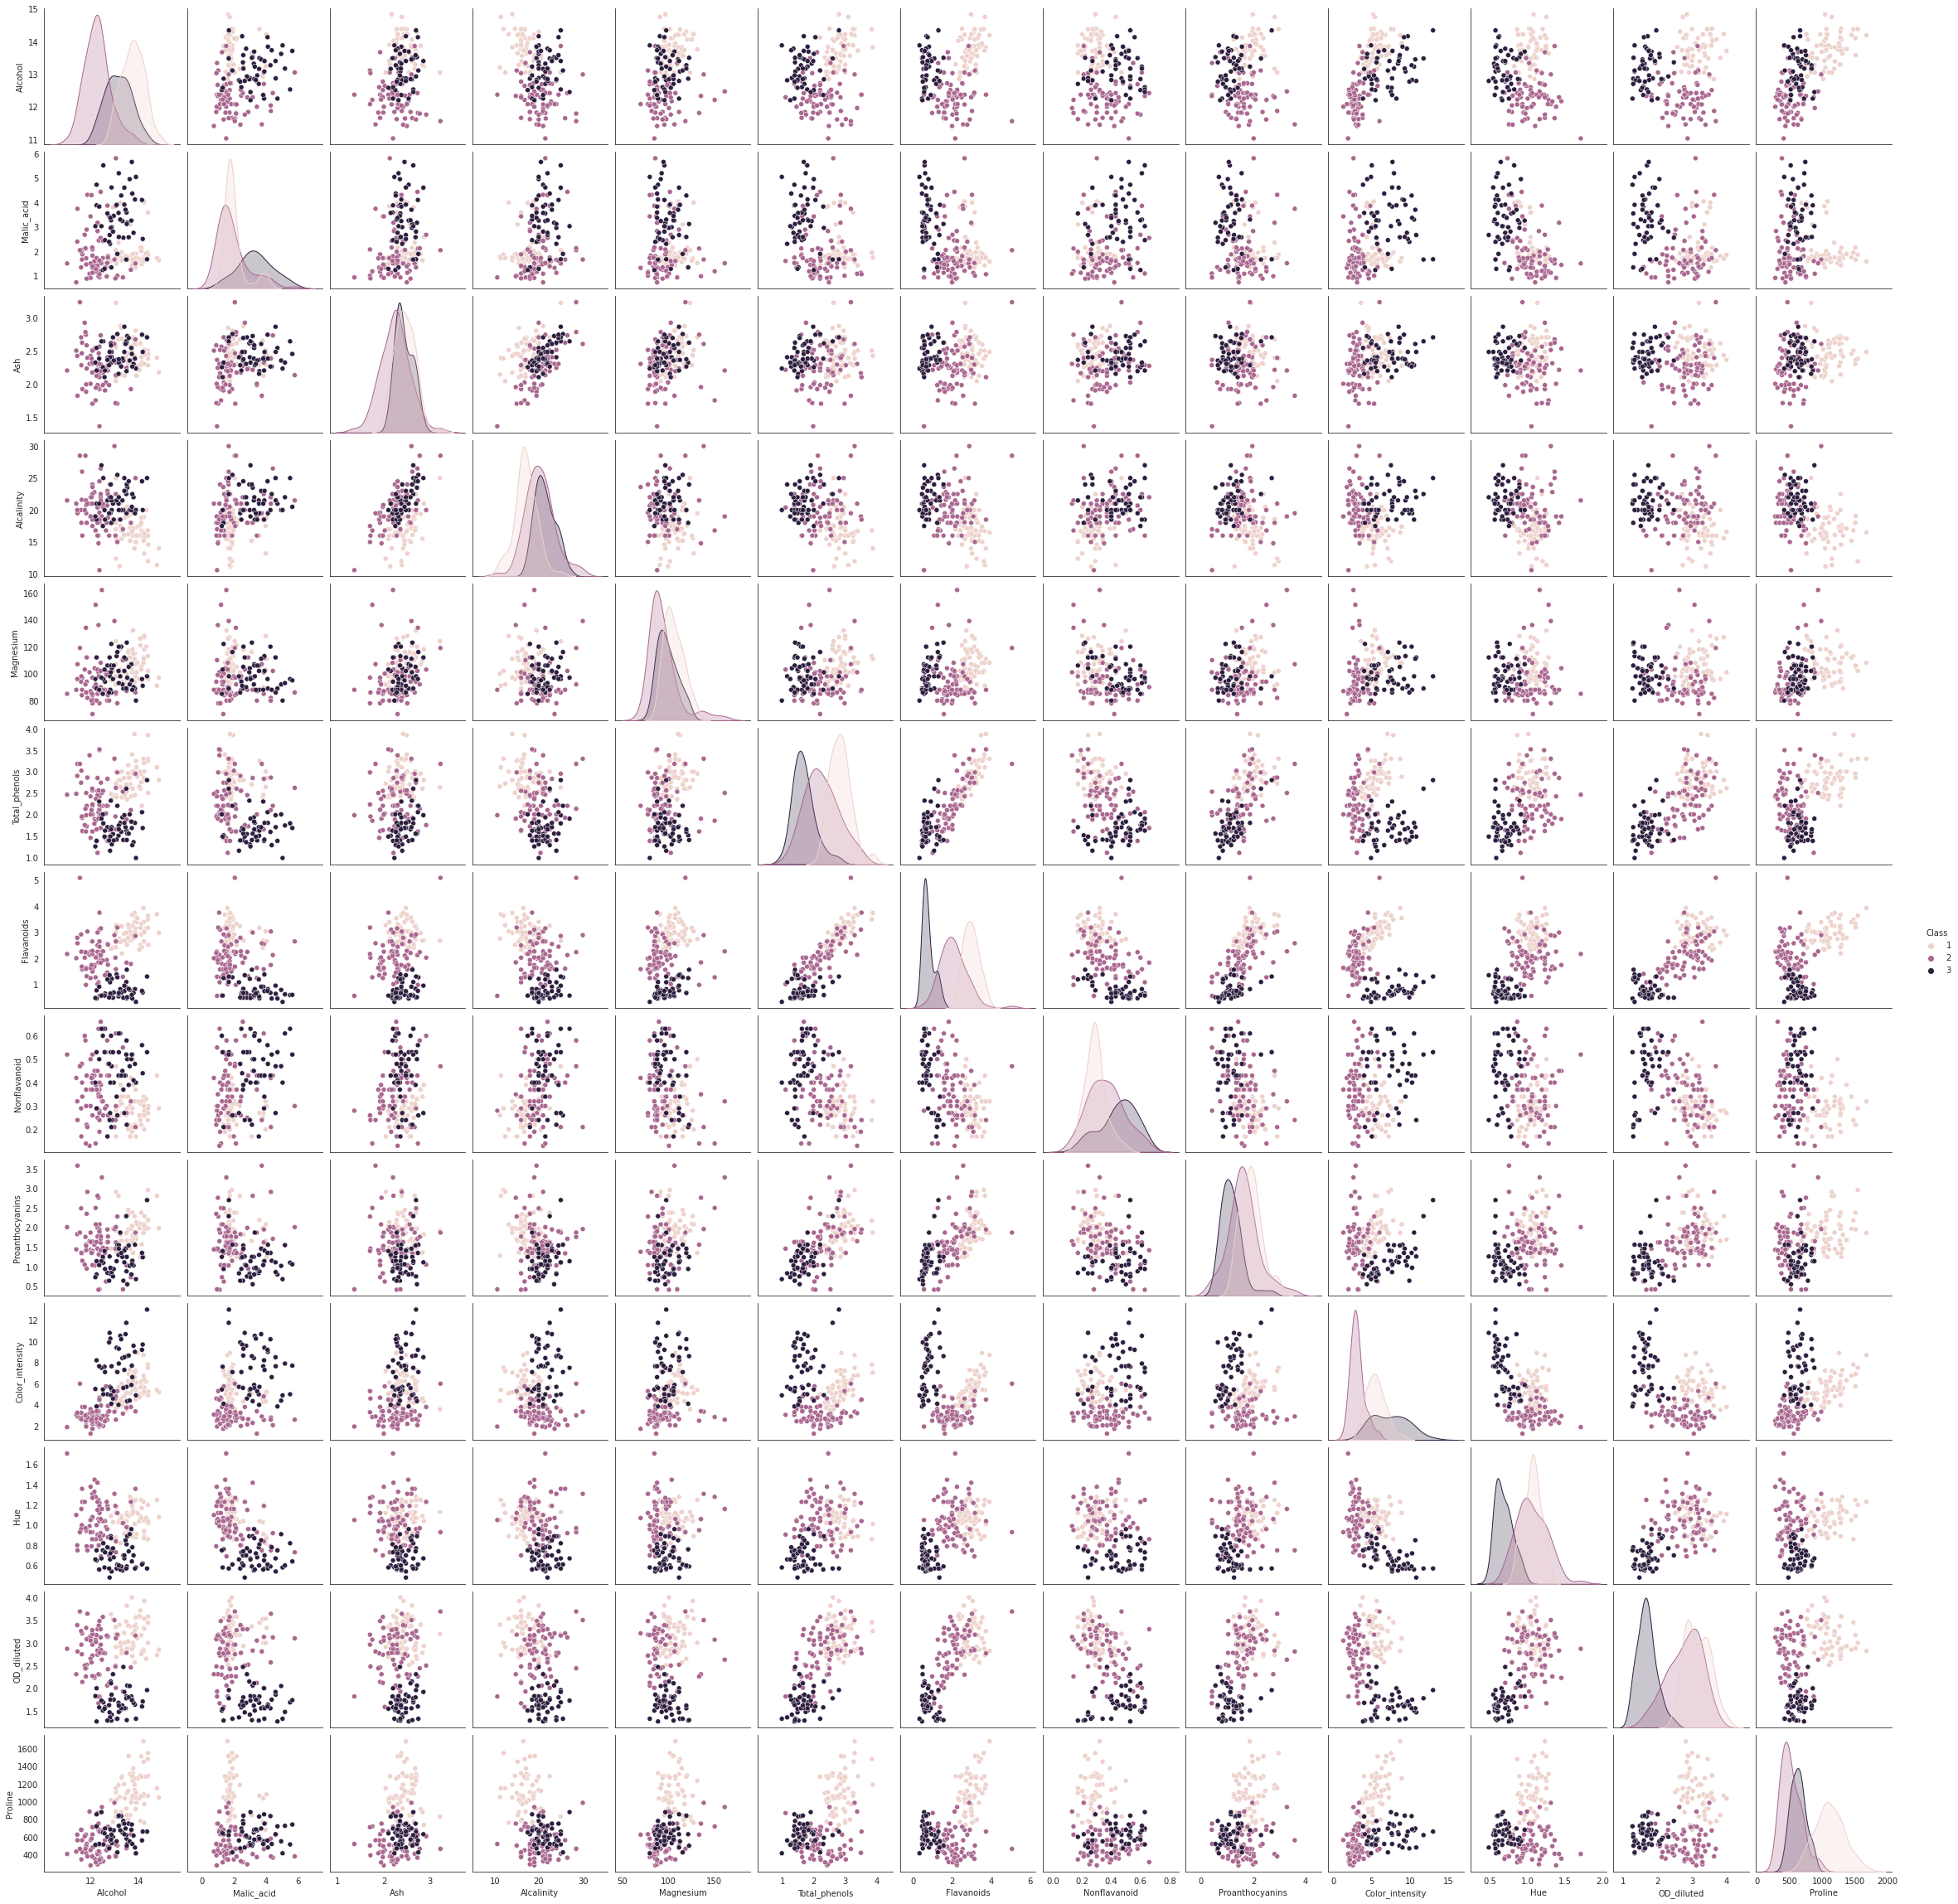

In [116]:
sns.pairplot(df_wine, hue='Class')

In [117]:
data_wine = df_wine.iloc[:, 1:].values
y_wine = df_wine.iloc[:, 0].values
print(data_wine.shape)

(178, 13)


The output variable is not taken into account when working with unsupervised learning problems.

In [118]:
scaler2 = MinMaxScaler()
data_wine_n = scaler2.fit_transform(data_wine)
data_wine_n = pd.DataFrame(data_wine_n)
data_wine_n

0         1         2         3         4         5         6   \
0    0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1    0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2    0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3    0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4    0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.705263  0.970356  0.582888  0.510309  0.271739  0.241379  0.056962   
174  0.623684  0.626482  0.598930  0.639175  0.347826  0.282759  0.086498   
175  0.589474  0.699605  0.481283  0.484536  0.543478  0.210345  0.073840   
176  0.563158  0.365613  0.540107  0.484536  0.543478  0.231034  0.071730   
177  0.815789  0.664032  0.737968  0.716495  0.282609  0.368966  0.088608   

           7         8         9         10        11        12  
0    0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1    0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2    0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3    0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4    0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  
..        ...       ...       ...       ...       ...       ...  
173  0.735849  0.205047  0.547782  0.130081  0.172161  0.329529  
174  0.566038  0.315457  0.513652  0.178862  0.106227  0.336662  
175  0.566038  0.296530  0.761092  0.089431  0.106227  0.397290  
176  0.754717  0.331230  0.684300  0.097561  0.128205  0.400856  
177  0.811321  0.296530  0.675768  0.105691  0.120879  0.201141  

[178 rows x 13 columns]

In [119]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_wine_n, y_wine, test_size=0.3)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### **K-Means**

Unsupervised Learning Algorithm for Binary or Multiclass Classification. It is a Clustering Algorithm.

In [181]:
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(x_train2)
  inertia.append(km.inertia_)

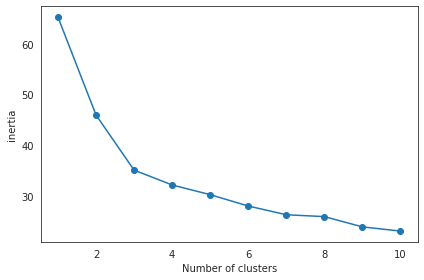

In [182]:
plt.figure(figsize = (6, 4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

In [183]:
k = 3
km = KMeans(n_clusters=k, init='random')
km.fit(x_train2)

KMeans(init='random', n_clusters=3)

In [184]:
pred_km = km.predict(x_test2)
print("Predicted output:", pred_km)

Predicted output: [0 1 1 1 1 0 2 2 2 1 1 2 2 1 1 1 0 1 2 1 0 0 2 0 1 2 0 0 1 1 2 1 2 0 1 0 2
 2 2 0 0 0 1 2 0 0 1 1 2 2 2 0 2 2]


In [185]:
inertia_value = km.inertia_
print(inertia_value)

35.19034484598528


### **K-Means ++**

Unsupervised Learning Algorithm for Binary or Multiclass Classification. It is a Clustering Algorithm.

In [155]:
inertia2 = []
for i in range(1, 11):
  km_1 = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  km_1.fit(x_train2)
  inertia2.append(km_1.inertia_)

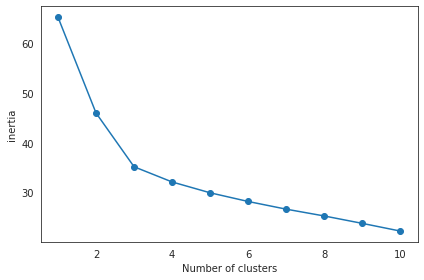

In [156]:
plt.figure(figsize = (6, 4))
plt.plot(range(1,11), inertia2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

In [175]:
k = 3
km_2 = KMeans(n_clusters=k, init='k-means++')
km_2.fit(x_train2)

KMeans(n_clusters=3)

In [176]:
pred1_km = km_2.predict(x_test2)
print("Predicted output:", pred1_km)

Predicted output: [0 1 1 1 1 0 2 2 2 1 1 2 2 1 1 1 0 1 2 1 0 0 2 0 1 2 0 0 1 1 2 1 2 0 1 0 2
 2 2 0 0 0 1 2 0 0 1 1 2 2 2 0 2 2]


In [177]:
inertia_value2 = km_2.inertia_
print(inertia_value2)

35.19034484598528


In [178]:
cluster_labels = np.unique(pred1_km)
n_clusters = cluster_labels.shape[0]

In [179]:
silhouette_vals = silhouette_samples(x_test2, pred1_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

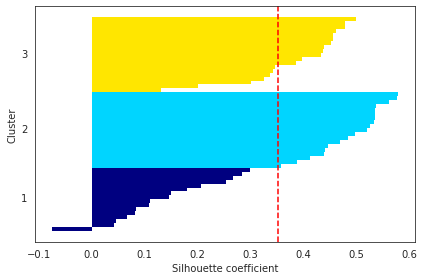

In [180]:
plt.figure(figsize = (6, 4))
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[pred1_km == c]    
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

## **DIMENSIONALITY REDUCTION**

In [133]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### **Principal Component Analysis (PCA)**

Example of Dimensionality Reduction with Iris Dataset.

In [135]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [136]:
x_iris = iris.iloc[:, :-1].values
y_iris = iris.iloc[:, -1].values

for i in range(150):
  if y_iris[i] == 'setosa':
    y_iris[i] = 0
  
  if y_iris[i] == 'versicolor':
    y_iris[i] = 1
  
  if y_iris[i] == 'virginica':
    y_iris[i] = 2

In [137]:
print(y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### **From Scratch**

In [138]:
x_centered = np.empty((150, 4))
x_centered = x_iris - x_iris.mean(axis=0)
print(x_centered)

[[-7.43333333e-01  4.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01 -5.40000000e-02 -2.35866667e+00 -9.98666667e-01]
 [-1.14333333e+00  1.46000000e-01 -2.45866667e+00 -9.98666667e-01]
 [-1.24333333e+00  4.60000000e-02 -2.25866667e+00 -9.98666667e-01]
 [-8.43333333e-01  5.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-4.43333333e-01  8.46000000e-01 -2.05866667e+00 -7.98666667e-01]
 [-1.24333333e+00  3.46000000e-01 -2.35866667e+00 -8.98666667e-01]
 [-8.43333333e-01  3.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.44333333e+00 -1.54000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01  4.60000000e-02 -2.25866667e+00 -1.09866667e+00]
 [-4.43333333e-01  6.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.04333333e+00  3.46000000e-01 -2.15866667e+00 -9.98666667e-01]
 [-1.04333333e+00 -5.40000000e-02 -2.35866667e+00 -1.09866667e+00]
 [-1.54333333e+00 -5.40000000e-02 -2.65866667e+00 -1.09866667e+00]
 [-4.33333333e-02  9.46000000e-01 -2.55866667e+00 -9.98666667e

In [139]:
U, s, Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]
c4 = Vt.T[:, 3]

In [140]:
W2 = Vt.T[:, :3]
X3D = x_centered.dot(W2)
print(X3D[:10, :])

[[-2.68420713 -0.32660731  0.02151184]
 [-2.71539062  0.16955685  0.20352143]
 [-2.88981954  0.13734561 -0.02470924]
 [-2.7464372   0.31112432 -0.03767198]
 [-2.72859298 -0.33392456 -0.0962297 ]
 [-2.27989736 -0.74778271 -0.17432562]
 [-2.82089068  0.08210451 -0.26425109]
 [-2.62648199 -0.17040535  0.01580151]
 [-2.88795857  0.57079803 -0.02733541]
 [-2.67384469  0.1066917   0.1915333 ]]


The first 3 components are chosen.

In [141]:
iris_data3 = pd.DataFrame({'PCA1':X3D[:, 0], 'PCA2':X3D[:, 1], 'PCA3':X3D[:, 2]})
fig = px.scatter_3d(iris_data3, x='PCA1', y='PCA2', z='PCA3', color=y_iris)
fig.show()

#### **Scikit-Learn**

In [142]:
pca = PCA(n_components = 3)
pca.fit(x_iris)
x_r = pca.transform(x_iris)

In [143]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

In [144]:
iris_data3_1 = pd.DataFrame({'PCA1':x_r[:, 0], 'PCA2':x_r[:, 1], 'PCA3':x_r[:, 2]})
fig = px.scatter_3d(iris_data3_1, x='PCA1', y='PCA2', z='PCA3', color=y_iris)
fig.show()

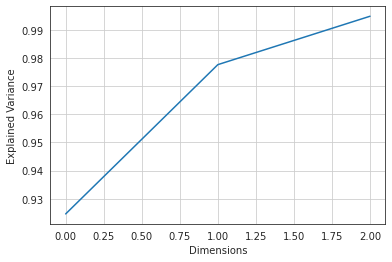

In [145]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()